<a href="https://colab.research.google.com/github/KritiM7/Banking-EDA-using-python/blob/main/Banking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
# This pulls the data
url = 'https://raw.githubusercontent.com/KritiM7/Banking-EDA-using-python/refs/heads/main/Banking.csv'
df = pd.read_csv(url, encoding='latin-1')

print(df.head())

  ï»¿Client ID             Name  Age  Location ID Joined Bank  \
0     IND81288    Raymond Mills   24        34324  06-05-2019   
1     IND65833    Julia Spencer   23        42205  10-12-2001   
2     IND47499   Stephen Murray   27         7314  25-01-2010   
3     IND72498   Virginia Garza   40        34594  28-03-2019   
4     IND60181  Melissa Sanders   46        41269  20-07-2012   

    Banking Contact Nationality            Occupation Fee Structure  \
0    Anthony Torres    American  Safety Technician IV          High   
1  Jonathan Hawkins     African   Software Consultant          High   
2     Anthony Berry    European    Help Desk Operator          High   
3        Steve Diaz    American          Geologist II           Mid   
4        Shawn Long    American   Assistant Professor           Mid   

  Loyalty Classification  ...  Bank Deposits  Checking Accounts  \
0                   Jade  ...     1485828.64          603617.88   
1                   Jade  ...      641482.79    

In [65]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [66]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


<Axes: xlabel='Income Band'>

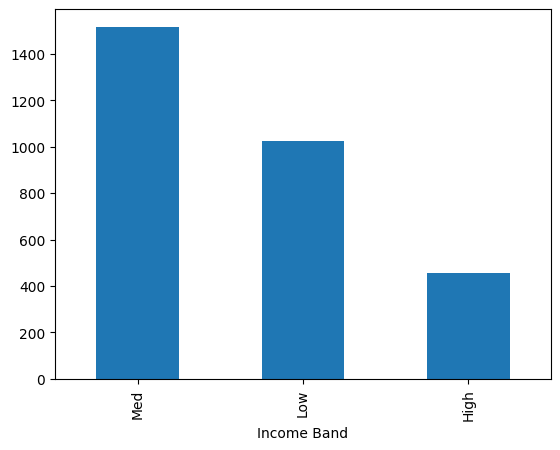

In [67]:
# Creating bins to categorize the data to get an idea for income band

bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

df['Income Band'].value_counts().plot(kind='bar')

In [68]:
# 1. Defining the columns that I want to see
target_cols = [
    'BRId', 'GenderId', 'IAId', 'Amount of Credit Cards',
    'Nationality', 'Occupation', 'Fee Structure',
    'Loyalty Classification', 'Properties Owned', 'Risk weighting', 'Age'
]

existing_categorical_cols = [col for col in target_cols if col in df_final.columns]

# 3. Run the analysis on the existing columns to check value count
for col in existing_categorical_cols:
    print(f"\n--- Value Counts for '{col}': ---")
    display(df_final[col].value_counts())


--- Value Counts for 'BRId': ---


,count
BRId,
3,1352
1,660
2,495
4,493



--- Value Counts for 'GenderId': ---


,count
GenderId,
2,1512
1,1488



--- Value Counts for 'IAId': ---


,count
IAId,
1,177
2,177
3,177
4,177
8,177
9,176
13,176
12,176
10,176



--- Value Counts for 'Amount of Credit Cards': ---


,count
Amount of Credit Cards,
1,1922
2,765
3,313



--- Value Counts for 'Nationality': ---


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176



--- Value Counts for 'Occupation': ---


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6



--- Value Counts for 'Fee Structure': ---


,count
Fee Structure,
High,1476
Mid,962
Low,562



--- Value Counts for 'Loyalty Classification': ---


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317



--- Value Counts for 'Properties Owned': ---


,count
Properties Owned,
2,777
1,776
3,742
0,705



--- Value Counts for 'Age': ---


,count
Age,
28,60
76,59
73,54
27,54
47,52
...,...
82,34
57,33
77,32


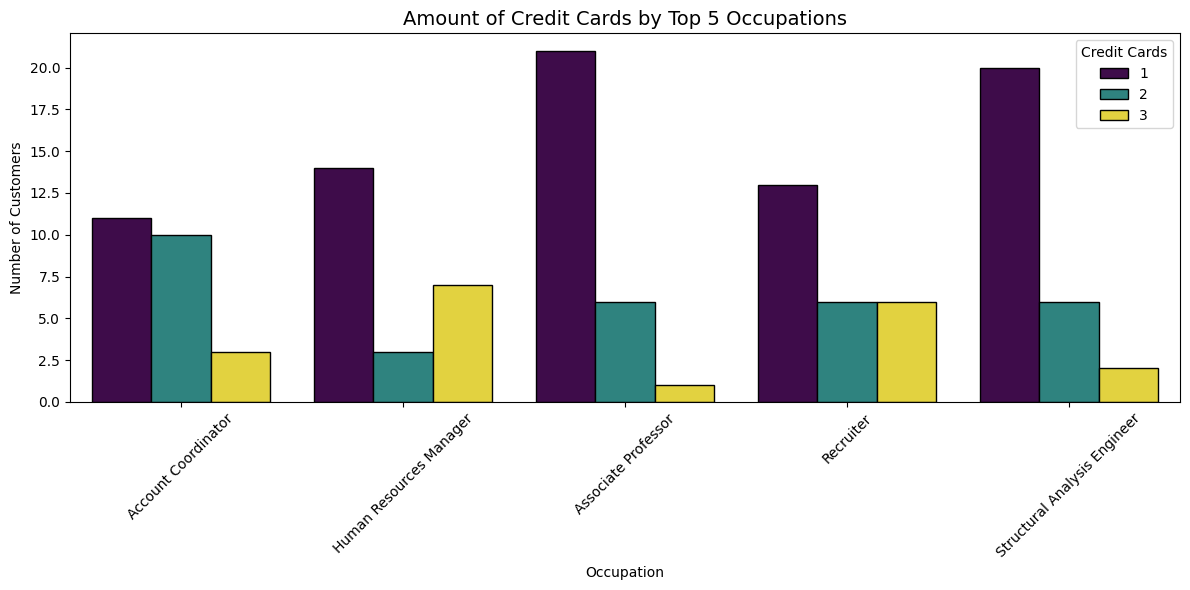

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Bar Chart for Occupation (Top 5 most frequent. This prevents "Chart Noise" and focuses the analysis on the most statistically significant segments of the bank's workforce data)
top_occupations = df_final['Occupation'].value_counts().nlargest(5).index

# Filter the dataframe to only include these Top 5
df_top_occ = df_final[df_final['Occupation'].isin(top_occupations)]

# Create the Bivariate Plot
plt.figure(figsize=(12, 6))

# Use hue='Amount of Credit Cards' to compare the counts within each Occupation
sns.countplot(
    data=df_top_occ,
    x='Occupation',
    hue='Amount of Credit Cards',
    palette='viridis',
    edgecolor='black'
)

plt.title('Amount of Credit Cards by Top 5 Occupations', fontsize=14)
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Credit Cards')
plt.tight_layout()
plt.show()

**Why Occupation Matters for Credit Products**

What the data is telling us: While most customers across all jobs prefer sticking to just one credit card, we see a really interesting shift when we look at specific roles. Human Resources Managers and Recruiters, for instance, are much more likely to carry three cards compared to Associate Professors or Engineers.

So What?: This suggests that "people-oriented" or managerial roles in our database have a higher credit appetite. It’s a great hint for the marketing team: instead of a "one-size-fits-all" campaign, the bank should probably pitch premium multi-card bundles to these managerial segments first, as they are already showing they want the extra spending power.

My Recommendation: For the technical segments—like the Structural Analysis Engineers—where we see almost no one with three cards, the bank should investigate why. Is it because our current rewards don’t appeal to them? Or is it a risk-weighting issue? Finding the right "hook" for these untapped groups could be a major growth opportunity.

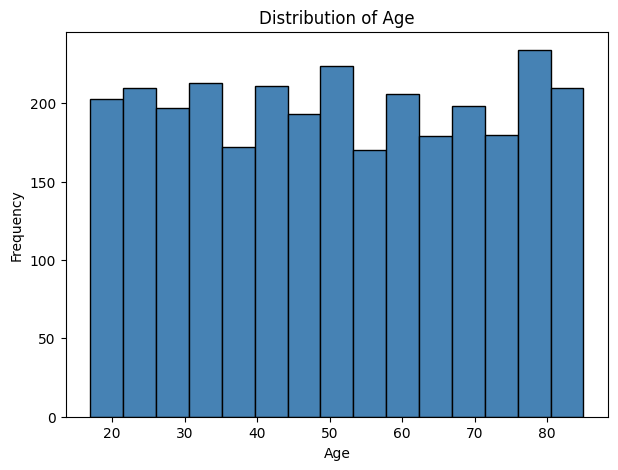

In [70]:
# 2. Bar Chart  for Age
plt.figure(figsize=(7, 5))
df_final['Age'].plot(kind='hist', bins=15, color='steelblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

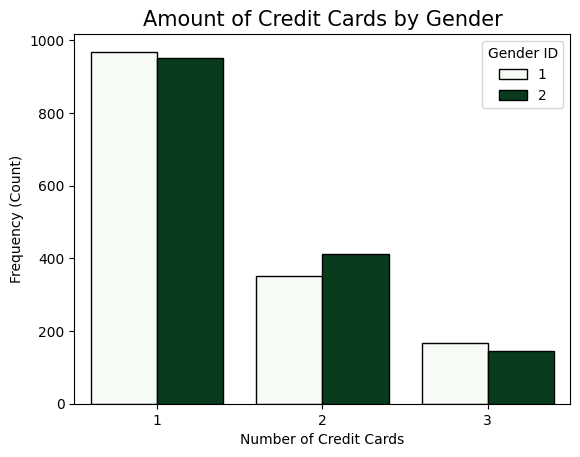

In [71]:
# 3. Bar Chart for Amount of Credit Cards based on gender
# x: The discrete numbers (1, 2, 3 cards)
# hue: The category to compare by (GenderId)
sns.countplot(data=df_final, x='Amount of Credit Cards', hue='GenderId', palette='Greens', edgecolor='black')

# Formatting the plot
plt.title('Amount of Credit Cards by Gender', fontsize=15)
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency (Count)')
plt.legend(title='Gender ID', loc='upper right')

**Does Gender Influence Credit Card Adoption?**

What the data is telling us: When we look at the breakdown between Gender 1 and Gender 2, the behavior is remarkably similar at the extremes. Both groups show a heavy preference for carrying just one card, and both have a similar drop-off when it comes to carrying three. However, there is a slight "bump" in the middle—Gender 2 appears slightly more likely to hold two credit cards than Gender 1.

So What?: From a marketing perspective, this is actually good. It suggests that gender isn't a major "barrier" or a primary driver for credit appetite in our current market. The bank’s credit products are being adopted fairly equally across the board, which speaks to a well-balanced product appeal.

My Recommendation: Since the "2-card" segment is where we see the most divergence, the bank could look into whether specific lifestyle perks (like grocery rewards vs. travel points) are driving that small lead for Gender 2. If we can pin down what makes that second card attractive to one group, we can mirror that strategy to upsell the "1-card" holders in the other group.

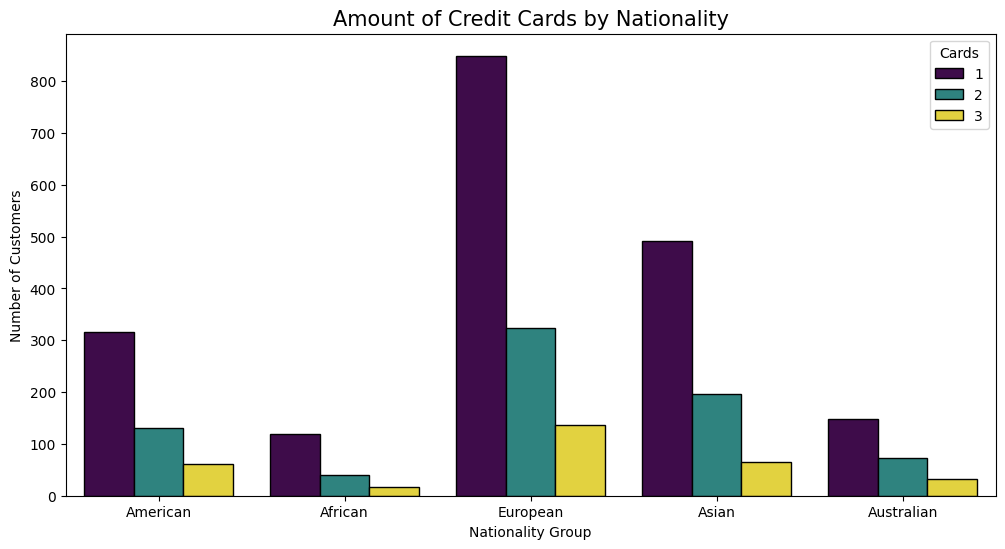

In [72]:
# 4. Bar Chart (Histogram) for Nationality

plt.figure(figsize=(12, 6))

# x is Nationality, hue divides each nationality by the number of credit cards
sns.countplot(
    data=df_final,
    x='Nationality',
    hue='Amount of Credit Cards',
    palette='viridis',
    edgecolor='black'
)
plt.title('Amount of Credit Cards by Nationality', fontsize=15)
plt.xlabel('Nationality Group')
plt.ylabel('Number of Customers')
plt.legend(title='Cards', loc='upper right')
plt.show()

**Regional Trends in Credit Card Adoption**

What the data is telling us: Across all nationalities, there is a consistent "step-down" pattern where the majority of customers hold just one card, followed by a significantly smaller group with two, and a tiny minority with three. European customers are our largest segment by far, but when you look at the proportions, American and Asian customers actually show a slightly higher "credit density"—meaning a larger percentage of their total groups are moving beyond just that first card compared to the African or Australian segments.

So What?: This tells us that our European market is "mature" but potentially under-utilizing our credit products. Since they make up the bulk of our deposits (as seen in our earlier charts), there is a massive opportunity to convert those 1-card European holders into 2-card holders. On the flip side, the American and Asian segments seem more open to multi-card relationships, making them ideal targets for "early-adopter" premium product launches.

My Recommendation: We should look at "Cross-Border" features. If the American and Asian segments are more active with multiple cards, perhaps they are using them for travel or international business. Adding specialized rewards for these activities could help us "stick" to these customers more effectively and encourage our large European base to expand their relationship with the bank.

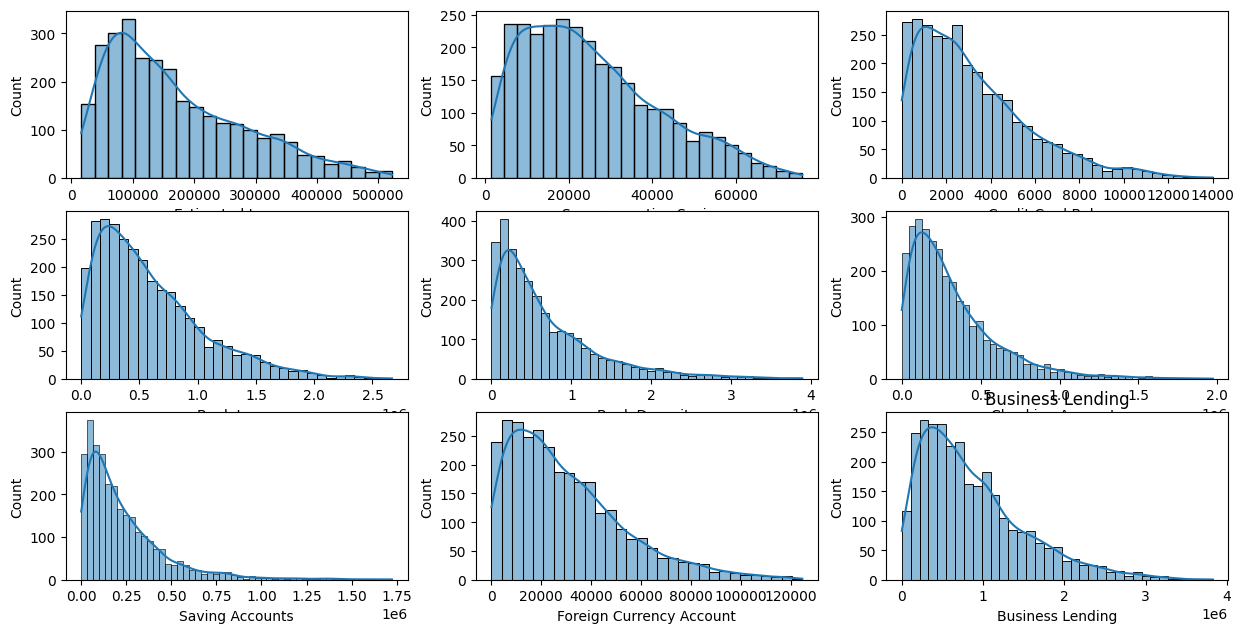

In [73]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
plt.title(col)
plt.show()

**Distribution of Customer Financial Products**

What the data is telling us: Across all financial variables, the distributions are heavily right-skewed, meaning most customers hold relatively low to moderate balances, while a small minority account for very large values. This pattern is consistent across income, deposits, savings, credit card balances, and lending products.

Transactional accounts (Savings, Checking, Foreign Currency) show high concentration at the lower end, suggesting that everyday banking usage dominates, with fewer customers maintaining large balances. Credit-related products such as Credit Card Balance and Bank Loans also follow this skew, indicating that high credit exposure is limited to a small segment.

Business Lending stands out with the widest spread, highlighting a highly unequal distribution where a small group of customers drive most of the lending value.

So what? The customer base is largely mass-market, with value concentrated in a thin upper tier. Average values may be misleading here, as they are heavily influenced by a small number of high-balance customers.

Recommendation: Segment customers using percentiles or tiers rather than averages. Tailored strategies should focus on protecting and expanding relationships with high-balance customers, while scalable, low-cost offerings can serve the majority low-balance segment efficiently.

<Axes: >

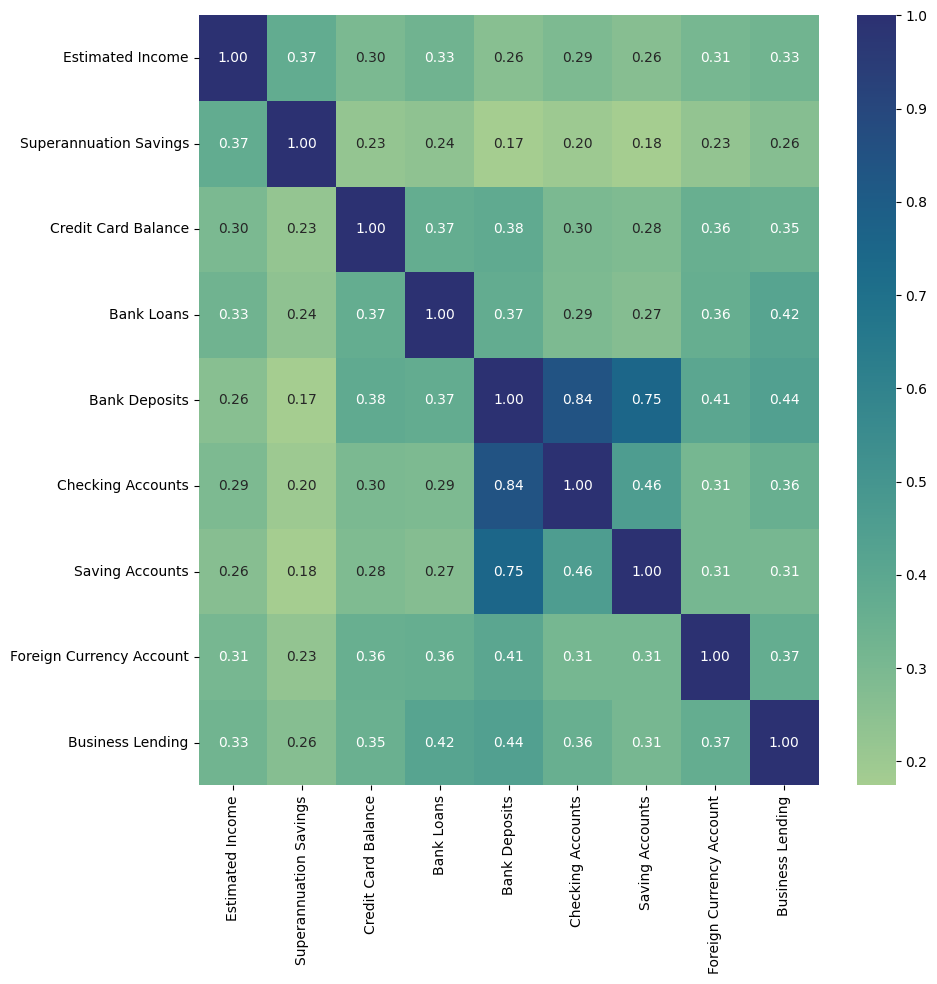

In [75]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt= '.2f')

**Customer Financial Relationship Patterns**
What the data is telling us: Across customer financial products, there is a clear clustering effect around core banking balances. Bank Deposits show a very strong correlation with Checking Accounts (0.84) and Savings Accounts (0.75), indicating that customers who keep higher deposits typically maintain multiple transactional accounts within the same bank. This suggests a strong “primary bank” relationship rather than fragmented usage.

Credit products behave slightly differently. Credit Card Balance and Bank Loans have a moderate correlation (~0.37), implying that customers using one form of credit are somewhat more likely—but not guaranteed—to use another. Business Lending also shows moderate correlations with Bank Deposits (0.44) and Bank Loans (0.42), suggesting that higher-value customers are more likely to engage across both deposit and lending products.

Income-related variables show only mild correlations across most products. Estimated Income correlates moderately with Bank Loans (0.33) and Business Lending (0.33), but not strongly with savings or deposits. This indicates that income alone does not fully explain product adoption—relationship depth matters more.

So what? This heatmap tells us that customer value is driven more by relationship consolidation than by income level. Customers who trust the bank with their deposits are significantly more likely to expand into multiple account types and higher-value lending products. However, credit products are not being automatically cross-sold alongside deposits, revealing a potential gap in product bundling.

The relatively weak correlation between Superannuation Savings and other products suggests it is treated as a standalone or passive product, rather than part of a broader financial relationship.

Recommendation: We should focus on deposit-led cross-selling strategies. Customers with high Bank Deposits and active Checking/Savings Accounts are prime candidates for targeted offers in credit cards, personal loans, and business lending. Instead of income-based targeting, campaigns should prioritize existing relationship depth.

Additionally, Superannuation customers represent a missed engagement opportunity. Bundling retirement products with everyday banking incentives (such as fee waivers or bonus interest for linked accounts) could help convert passive holders into multi-product customers.

Overall, strengthening cross-product journeys around deposit-heavy customers can significantly increase lifetime value while leveraging existing trust.